<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Supervised-Models/Boston_Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## Load data into a DataFrame

In [5]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
print(f'Total number of observation in the datset {data.shape[0]}')
print(f'Total number of attributes in the datset {data.shape[1]}')

Total number of observation in the datset 506
Total number of attributes in the datset 14


## Data Statistics

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Check for NULL values

In [8]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

The dataset has no null  values

## Data Visualization

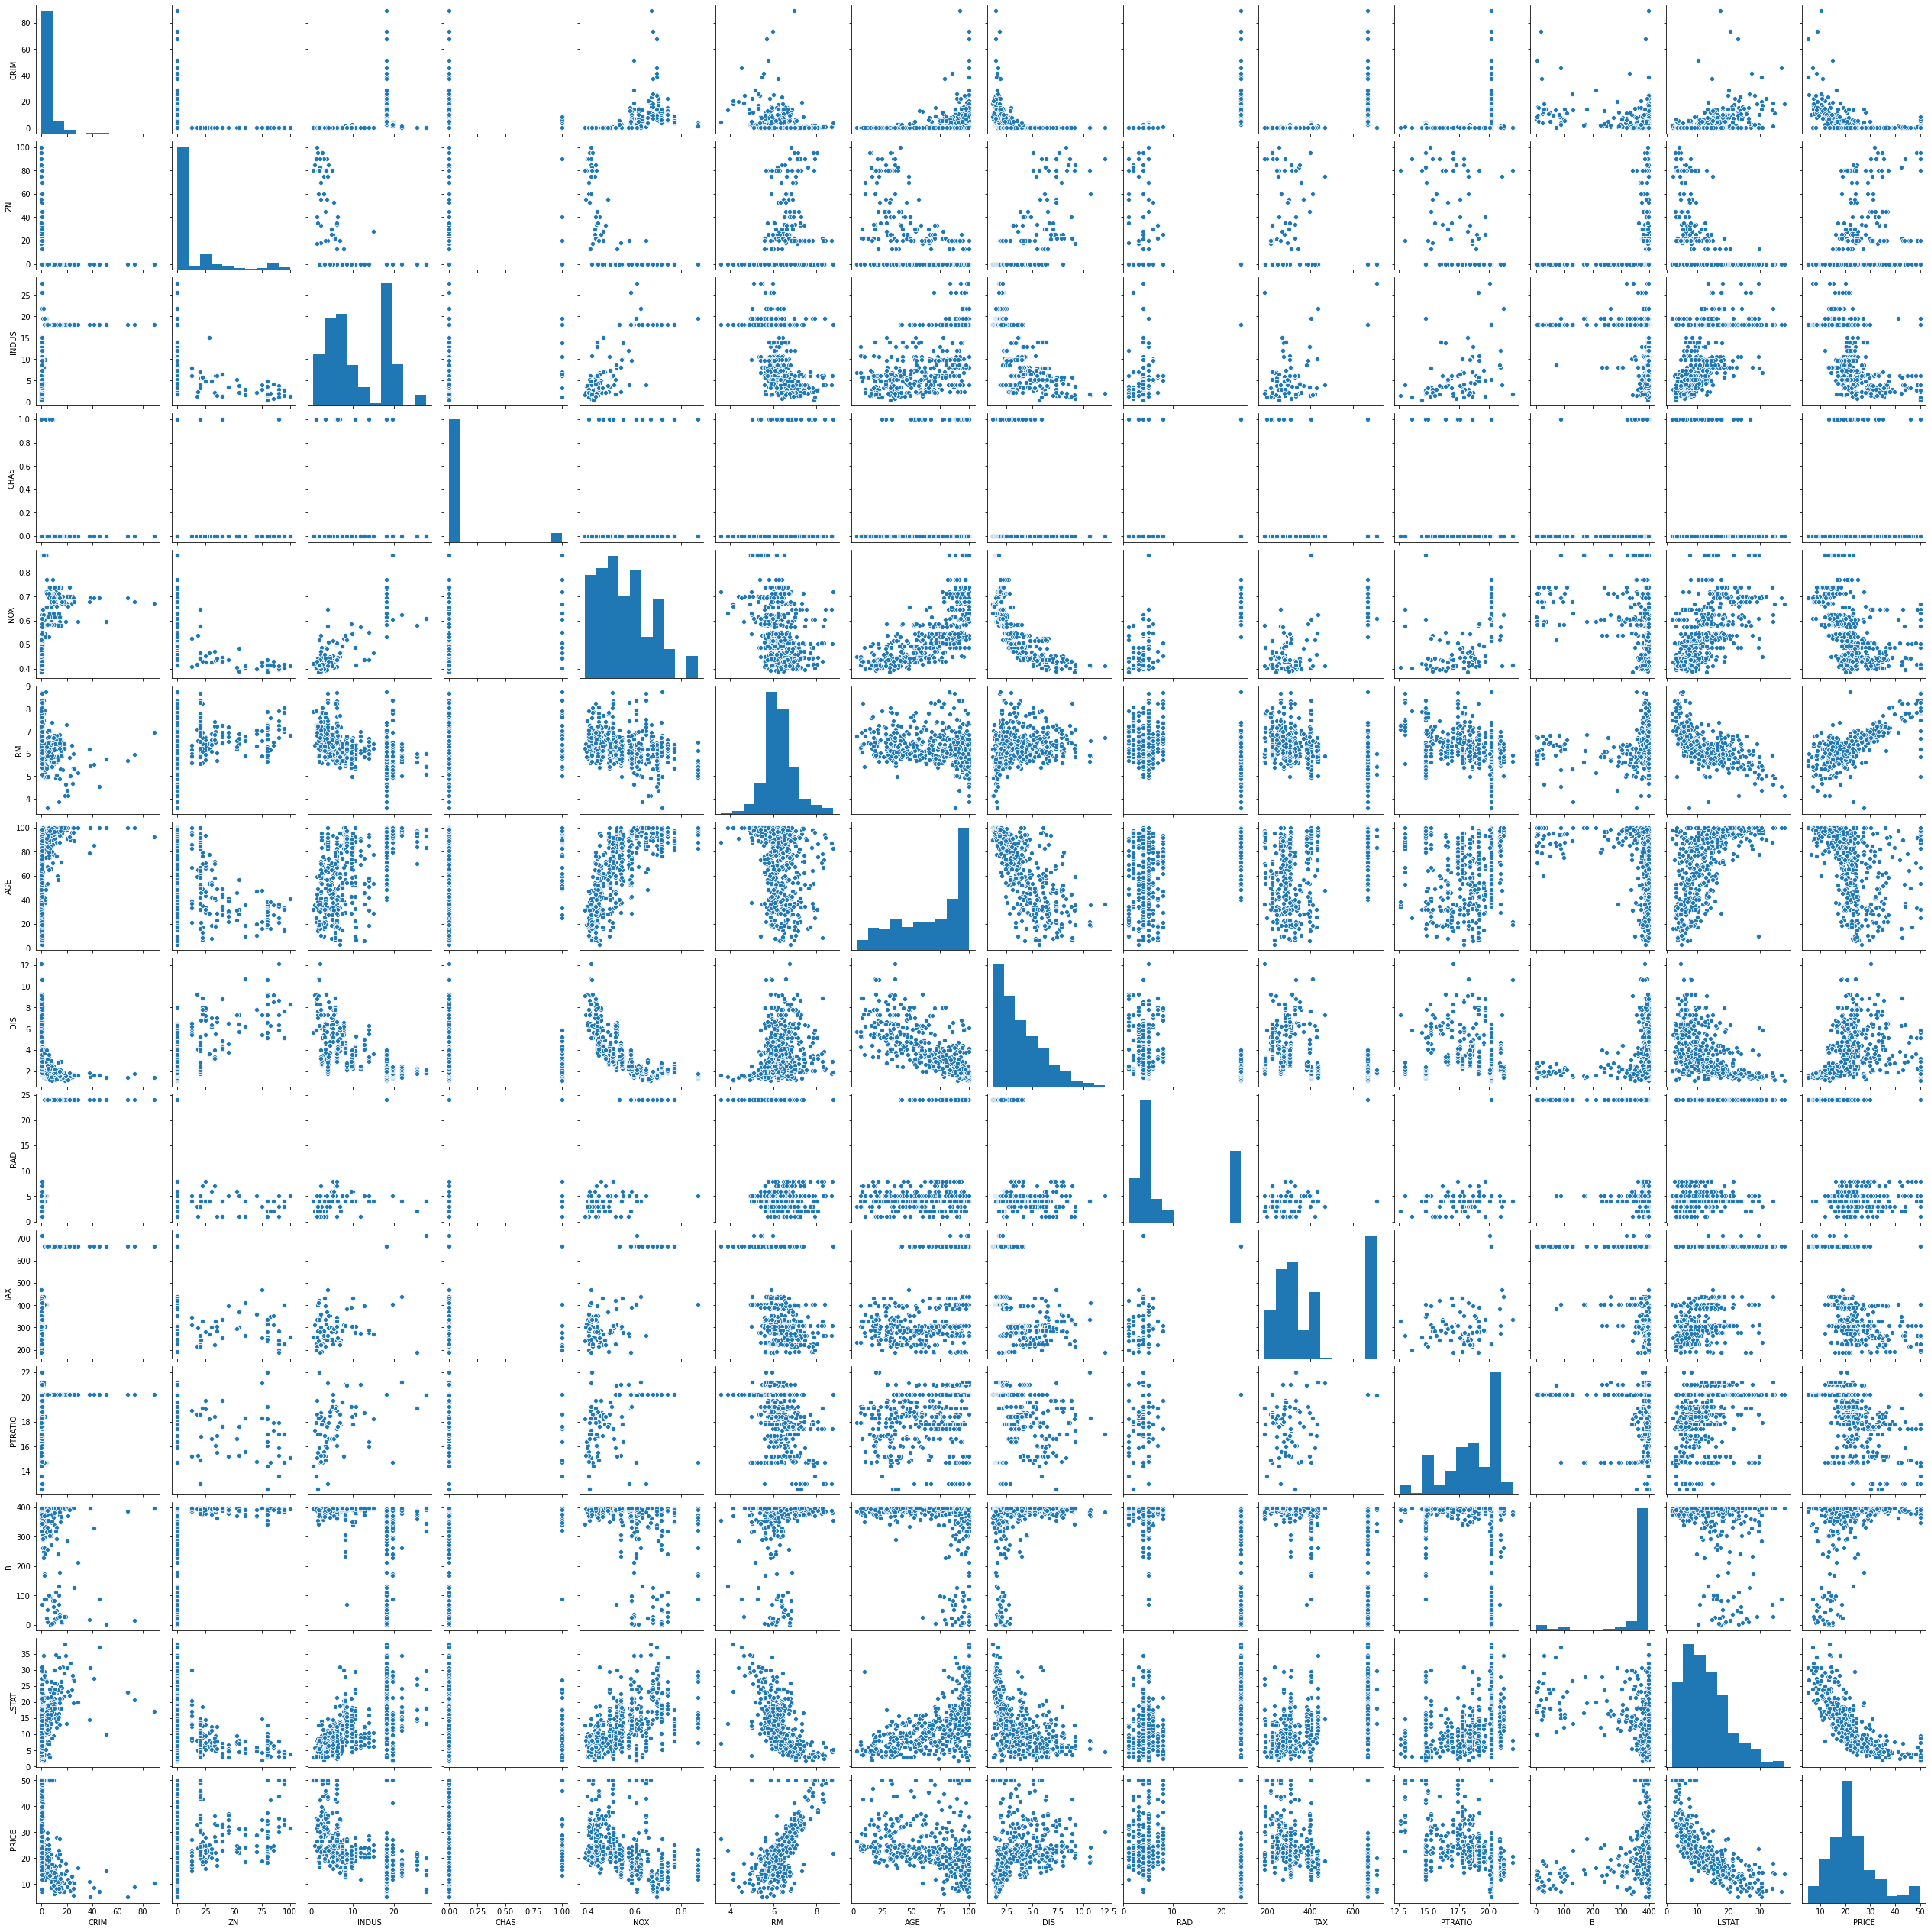

In [13]:
sns.pairplot(data)

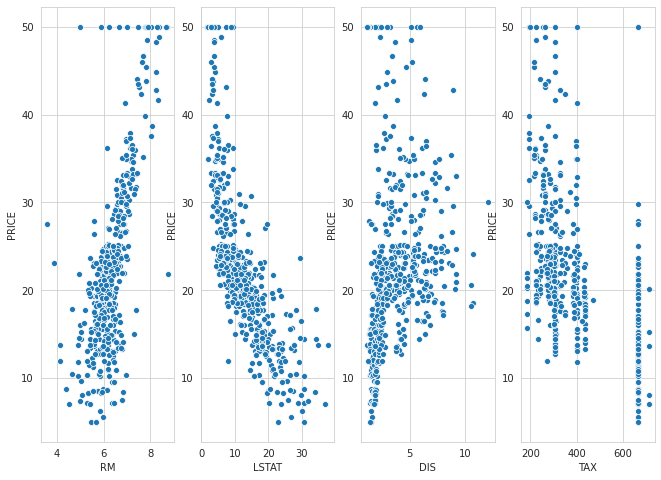

In [22]:
sns.set_style('whitegrid')
f, axes = plt.subplots(1, 4,figsize=(11,8))
sns.scatterplot(x='RM',y='PRICE',data=data,ax=axes[0])
sns.scatterplot(x='LSTAT',y='PRICE',data=data,ax=axes[1])
sns.scatterplot(x='DIS',y='PRICE',data=data,ax=axes[2])
sns.scatterplot(x='TAX',y='PRICE',data=data,ax=axes[3])

## Determine Multicolinearity if exists among Independent Features

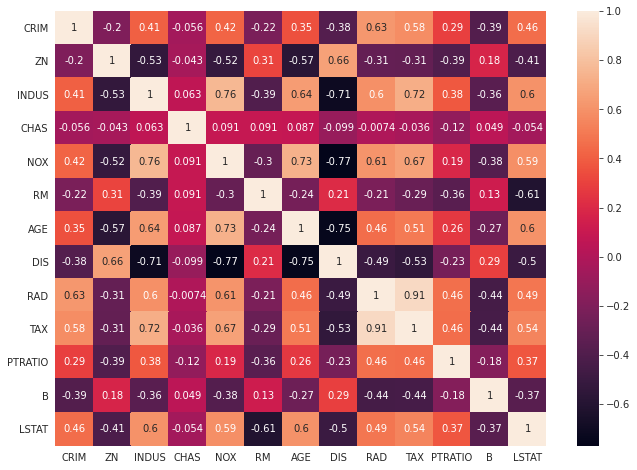

In [18]:
corr = data.drop('PRICE',axis=1).corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr,annot=True,fmt='.2g')

In [19]:
corr =  data.drop('PRICE',axis=1).corr().abs()
up_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
#find all features having a correlation > 85%
correlated_features = [col for col in up_tri.columns if any(up_tri[col] > 0.85)]
print(correlated_features)

['TAX']


## Separate Independent and dependent features and drop the correlated feature

In [0]:
X = data.drop(correlated_features + ['PRICE'],axis=1)
Y = data['PRICE']

In [24]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


## Split the dataset into training and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)

In [28]:
print(f'training set shape {X_train.shape}')
print(f'test set shape {X_test.shape}')

training set shape (430, 12)
test set shape (76, 12)


##Create Pipeline With Model Selection Search Space

In [0]:
# Create a pipeline
pipe = Pipeline([('classifier', RandomForestRegressor())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LinearRegression()],
                 'classifier__normalize': [True,False]},
                {'classifier': [RandomForestRegressor()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

## Create Model Selection Using Grid Search

In [0]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=2)

In [31]:
# Fit grid search
best_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] classifier=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), classifier__normalize=True 
[CV]  classifier=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), classifier__normalize=True, total=   0.0s
[CV] classifier=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), classifier__normalize=True 
[CV]  classifier=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), classifier__normalize=True, total=   0.0s
[CV] classifier=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), classifier__normalize=True 
[CV]  classifier=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), classifier__normalize=True, total=   0.0s
[CV] classifier=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), classifier__normalize=True 
[CV]  classifier=Li

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  classifier=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False), classifier__max_features=1, classifier__n_estimators=100, total=   0.1s
[CV] classifier=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, 

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   25.6s finished


## View Best Model And Its Best Hyperparameters

In [33]:
best_model.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features=3, max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [34]:
best_model.best_params_

{'classifier': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 'classifier__max_features': 3,
 'classifier__n_estimators': 1000}

In [32]:
best_model.best_estimator_.get_params()['classifier']

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Make Prediction on test data

In [0]:
y_pred = best_model.predict(X_test)

## Evaluating The Predictions made by the Model

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print(f'RMSE score : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R Squared  score : {r2_score(y_test,y_pred)}')
print(f'Mean Absolute Error score : {mean_absolute_error(y_test,y_pred)}')

RMSE score : 3.1269013098980545
R Squared  score : 0.8940513449545792
Mean Absolute Error score : 2.436663157894743


## Compare the predictions with actual data

In [0]:
df_pred = pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':y_pred})

In [0]:
df_pred['Difference'] = abs(df_pred['Actual_Price']- df_pred['Predicted_Price'])

In [41]:
df_pred

,Actual_Price,Predicted_Price,Difference
307,28.2,29.8653,1.6653
343,23.9,28.0733,4.1733
47,16.6,19.7945,3.1945
67,22.0,21.2387,0.7613
362,20.8,19.5531,1.2469
...,...,...,...
386,10.5,7.9254,2.5746
366,21.9,18.0290,3.8710
29,21.0,20.6748,0.3252
107,20.4,19.9029,0.4971


In [0]:
pred = X_test.copy()

In [0]:
pred['Actual_Price'] = y_test
pred['Predicted_Price'] = y_pred

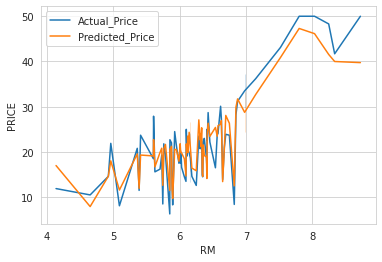

In [49]:
sns.lineplot(x='RM',y='Actual_Price',data=pred,label='Actual_Price')
sns.lineplot(x='RM',y='Predicted_Price',data=pred,label='Predicted_Price')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.legend()

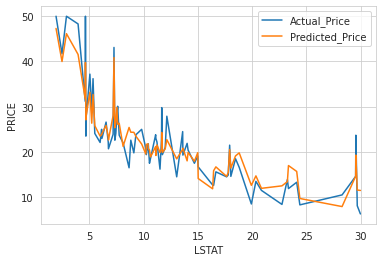

In [50]:
sns.lineplot(x='LSTAT',y='Actual_Price',data=pred,label='Actual_Price')
sns.lineplot(x='LSTAT',y='Predicted_Price',data=pred,label='Predicted_Price')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.legend()